<a href="https://colab.research.google.com/github/Ufoan/Taller_curso_inf_cuantica_525405/blob/main/Lab_practico_intro_qiskit_clase_2_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Teoría de la Información Cuántica: Comunicación y Computación (525405) 2025-1 <br>
#**Taller Introducción qiskit**: Clase 2. Teleportación Cuántica

# Parte I: ¿Qué es Teleportación cuántica?

## Problema








**Alice** quiere transmitir a **Bob** un estado cuántico $|\psi\rangle_{A}=a|0\rangle+b|1\rangle$ de un qubit (con $|a|^{2}+|b|^{2}=1$). Alice quiere lograr esto **solo enviando información clásica** a Bob.

Sin embargo, si intentáramos enviar este estado directamente en forma clásica, tendríamos que transmitir los valores de $a$ y $b$ que son números complejos continuos. Esto requeriría **una cantidad infinita de bits de información**, ya que no se puede representar un número real (o complejo) arbitrario con precisión exacta mediante un mensaje clásico finito.


## ¿Cómo lo podemos resolver? Teleportación Cuántica

La **teletransportación cuántica** es un protocolo que permite transferir el **estado cuántico de un qubit** desde un lugar (Alice) hacia otro (Bob), **sin mover físicamente la partícula** que lo contiene.

Lo que se transmite no es materia ni energía, sino la **información cuántica** del estado $|\psi\rangle = a|0\rangle + b|1\rangle$, que se recupera exactamente en el destino.

Para lograr esto, se requieren tres elementos fundamentales:

1. **Entrelazamiento**.

2. **Medición cuántica**.
3. **Comunicación clásica**.

El protocolo **preserva el principio de no-clonaje**, ya que el estado original en Alice se destruye durante la medición.  
Al final del proceso, Bob tiene una *copia* exacta del estado original, incluso si Alice no sabe cuál era.


## Protocolo

Alice tiene su estado $|\psi\rangle_{A}$, que podría  o no ser conocido. Además, Alice y Bob comparten un par de qubits en un estado de Bell, por ejemplo $|\beta_{11}\rangle_{CB}$, el cual es generado por una fuente EPR:

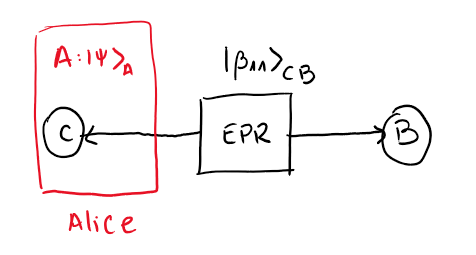


El protocolo consiste  en:

1. Alice mide los qubits  **A** y **C** en la base de Bell.
2. Alice envía  los resultados de las mediciones $x_{1}$, $x_{2}$ a Bob en dos bits clásicos de información .
3. Bob realiza la corrección, aplicando las operaciones unitarias $X$ y $Z$ a **B** dependiendo del resultado de las mediciones en el paso anterior. Si $x_{2}=0$ se aplica un $X$ y si $x_{1}=0$, se aplica un $Z$.

Es decir:

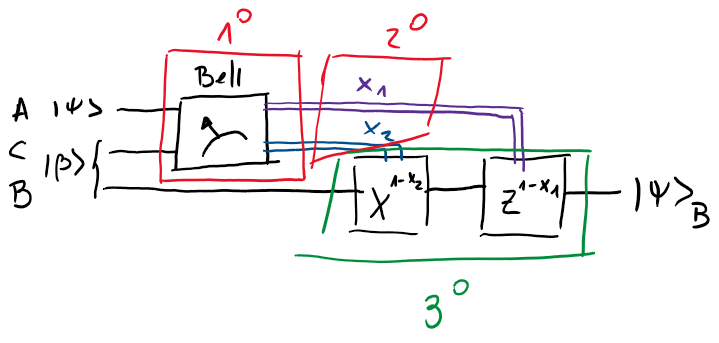

Como se puede ver en el dibujo del circuito, el protocolo en sí es *fácil* de implementar, pero existe aún un problema: **En general no se puede medir directamente en una base distinta a la computacional.**

## ¿Cómo medimos en base de Bell?


Recordemos que la base de Bell corresponde a $\{|\beta_{00}\rangle ,|\beta_{01}\rangle, |\beta_{10}\rangle, |\beta_{11}\rangle\}$, con:

* $|\beta_{00}\rangle=\frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$
* $|\beta_{01}\rangle=\frac{1}{\sqrt{2}}(|01\rangle+|10\rangle)$
* $|\beta_{10}\rangle=\frac{1}{\sqrt{2}}(|00\rangle-|11\rangle)$
* $|\beta_{11}\rangle=\frac{1}{\sqrt{2}}(|01\rangle-|10\rangle)$

Medir dos qubits en la base de Bell significa **identificar cuál de estos cuatro estados tiene el sistema**. Como no podemos medir directamente en esta base con un computador cuántico, lo que hacemos es:
- Aplicar una puerta $CNOT$ (control en el qubit $0$ y target en el qubit $1$),
- Luego una puerta $H$ al qubit $0$,
- Y finalmente, medimos ambos qubits en la base computacional (la estándar).

Esto transforma los estados de Bell en los estados $|00\rangle, |01\rangle, |10\rangle, |11\rangle $, permitiendo distinguirlos con una medición común.

# Parte II: Apliquemos el protocolo!

## Instalamos e importamos paquetes necesarios

In [ ]:
!pip install numpy matplotlib qiskit qiskit_aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=fa3c38a918dbaa107986274ec517b3dd25eb1af056e6b4d225c5edbd12e5f623
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

## Caso: Alice conoce su estado

Nos centraremos en el caso en que Alice conoce el estado a enviar. En este contexto, podemos comparar el estado que recibe Bob con el estado que tenía Alice inicialmente para ver si el protocolo funcionó realmente. Supongamos que el estado inicial de Alice es el estado $|+\rangle$.

### 1. **Preparaciones previas**

En qiskit los qubits comienzan en el estado $|0\rangle$, luego los pasos a seguir para preparar las condiciones iniciales debemos:
1. *Preparar* el estado de Alice, es decir, costruir el circuito que lleva $|0\rangle_{A}$ a $|\psi\rangle_{A}$.
2. *Preparar* el estado de Bell que ocuparemos, es decier, construir el circuito que lleva $|00\rangle_{CB}$ a $|\beta\rangle_{CB}$

#### **Ejercicio 1**: Construya un circuito de 3 qubits y 3 bits clásicos, luego agregue la puerta al qubit 0 que nos lleva $|0\rangle\longmapsto|+\rangle$.

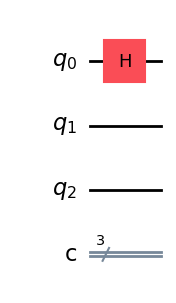

In [ ]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.draw('mpl')

#### **Ejercicio 2**: Agregue al circuito anterior las puertas necesarias para generar $|\beta_{11}\rangle_{CB}$.

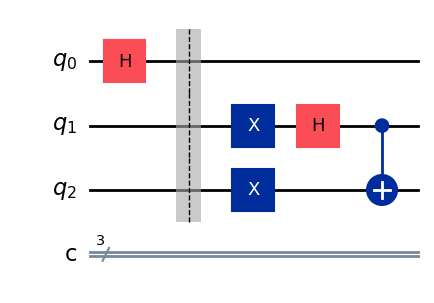

In [ ]:
#Pegar aquí resultado del ejercicio 1
qc = QuantumCircuit(3,3)
qc.h(0)
qc.barrier()
qc.x(1)
qc.x(2)
qc.h(1)
qc.cx(1,2)
qc.draw('mpl')

¡Con esto ya tenemos listas las preparaciones previas!

### 2. **Aplicamos la medición de Bell**

Como mencionamos anteriormente, hacer la medición de Bell en los qubits $AC$ era equivalente a aplicar una puerta $CNOT_{AC}$, seguido por una hadamard en $A$ y luego mediciones en la base computacional (las usuales) en $A$ y $C$.

#### **Ejercicio 3**: Agregue al circuito anterior las puertas necesarias para generar realizar la medición de Bell, incluyendo las mediciones.

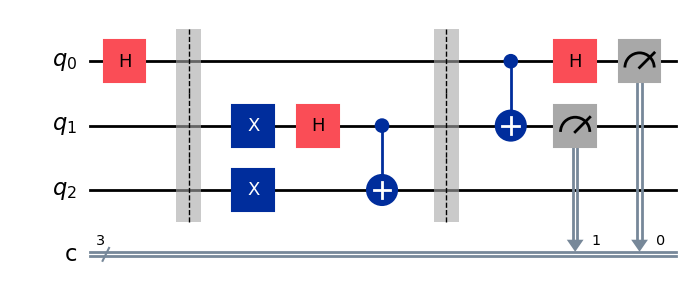

In [ ]:
#Pegar aquí resultado del ejercicio 1
qc = QuantumCircuit(3,3)
qc.h(0)
qc.barrier()
qc.x(1)
qc.x(2)
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.measure(1,1)
qc.draw('mpl')

Con esto ya se realizó la parte 1 y 2 del protocolo: Medición en base de bell y obtener los resultados.

### 2. **Bob aplica la corrección correspondiente y mide el qubit B**

El protocolo nos dice que ahora Bob debe realizar la corrección, Lo que corresponde a aplicar las operaciones unitarias $X$ y $Z$ a **B** dependiendo del resultado de las mediciones en el paso anterior. Si $x_{2}=0$ se aplica un $X$, si $x_{1}=0$, se aplica un $Z$.

Como la aplicación de $X$ y $Z$ dependen de los resultados de las mediciones, debemos aplicar una puerta condicional. Para esto utilizamos:



```
with qc.if_test((bit_clasico,resultado_obtenido_en_la_medición)):
    qc.puerta_a_agregar_si_se_satisface_la_condición(nro_qubit)
```

En el caso concreto de la puerta condicional con $X$, sería:

```
with qc.if_test((1,0)):
    qc.x(2)
```

Esto quiere decir que si el bit $1$ es $0$, se aplica la puerta, si vale $1$, no se hace nada.

#### **Ejercicio 4**: Agregue al circuito anterior la puerta condicional faltante más la medición del qubit $C$ (qubit 2) y guardalo en el bit 2.

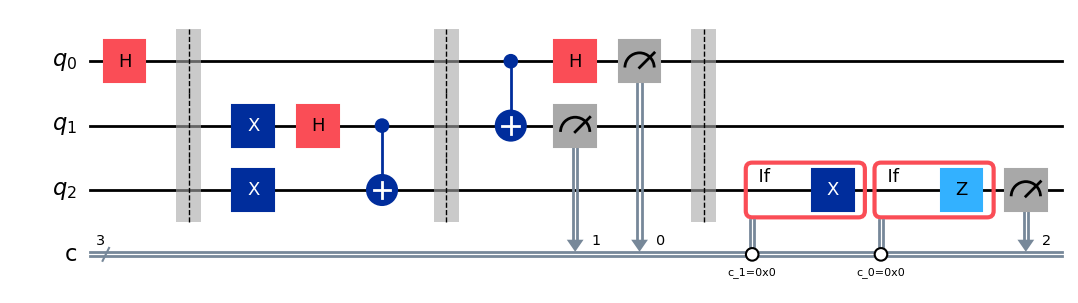

In [ ]:
qc = QuantumCircuit(3,3)
qc.h(0)
qc.barrier()
qc.x(1)
qc.x(2)
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
# Copar el código del ejercicio anterior
# Aplicamos la corrección según los resultados
with qc.if_test((1,0)): #Dejar este
    qc.x(2)
with qc.if_test((0,0)):
    qc.z(2)
qc.measure(2,2)
qc.draw('mpl')

Hasta aquí hemos construido el circuito correspondiente al protocolo cuando $|\psi\rangle_{A}=|+\rangle$ y el estado entrelazado en $CB$ es $|\beta_{11}\rangle$. Ahora debemos simular el circuito para ver si el estado que recibe Bob es efectivamente el estado $|+\rangle$.

### 3. **Simulación**

Importamos los paquetes:

In [ ]:
from qiskit_aer.primitives import Sampler
from qiskit.visualization import plot_histogram

#### **Ejercicio 5**: Simule el circuito ``qc`` con ``Sampler`` y grafique el histograma. Puede revisar el laboratorio anterior resuelto [aquí](https://github.com/Ufoan/Taller_curso_inf_cuantica_525405/blob/main/Lab_practico_intro_qiskit_clase_1_resuelto.ipynb).

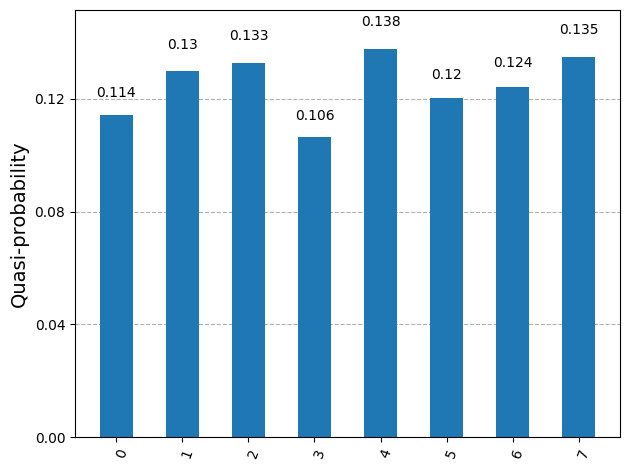

In [ ]:
sampler = Sampler()
job = sampler.run(qc)
result = job.result()
counts = result.quasi_dists
plot_histogram(counts)

Si observamos los resultados, estos no se ven como si tuvieran mucho sentido teniendo en cuenta que sólo estamos buscando el resultado del qubit de Bob, pero el sistema (y la información que obtuvimos) es un producto tensorial de tres qubits.

Lo que queremos ver realmente es cuantas veces se obtuvo un estado de la forma $|ab0\rangle$ y cuantas veces se obtuvo algo de la forma $|cd1\rangle$. Si el estado recibido es realmente $|+\rangle$ deberiamos tener una probabilidad de $0.5$ aprox para cada tipo.

Es más fácil de entender a lo que me refiero si vemos los resultados en su forma binaria:

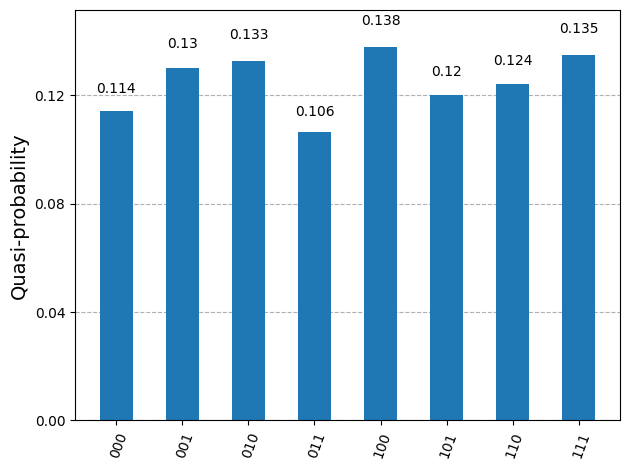

In [ ]:
counts_2 = result.quasi_dists[0].binary_probabilities()
plot_histogram(counts_2)

**IMPORTANTE**: Qiskit ordena los bits como cuando escribe un número binario, **por lo que el sentido en el que nos entrega la cadena de bits es el orden contrario a como estaban puestos los qubits**, es decir, la cadena de bits $100$ quiere decir que el bit 2, que era el asociado a $B$, vale $1$ y los bits asociados a $C$ y $A$ son ceros. Es decir, nos entrega la información en el orden $BCA$.

Si queremos ver realmente cuál es la probabilidad de $|0\rangle$ y $|1\rangle$, podemos hacer:

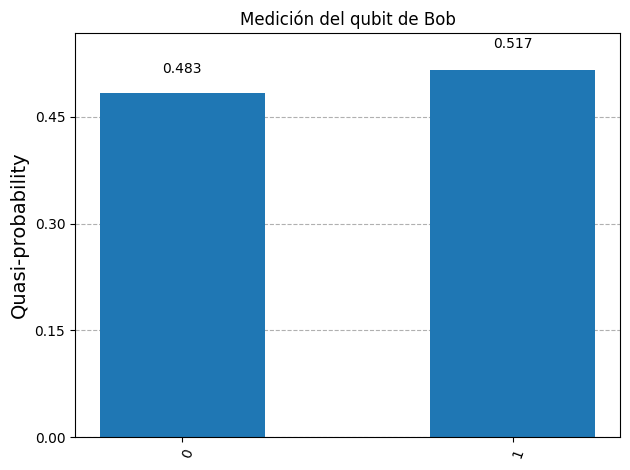

In [ ]:
from collections import Counter
bob_distribution = Counter()
for outcome, prob in counts_2.items():
    bob_bit = outcome[0]  # primer bit = qubit 2 = Bob porque qiskit entrega la info en bit 2,bit 1, bit 0...
    bob_distribution[bob_bit] += prob
plot_histogram(bob_distribution, title="Medición del qubit de Bob")

Como podemos ver, efectivamente la probabilidad de obtener $|0\rangle$ y $|1\rangle$ es $0.5$ aproximadamente, por lo que Bob si recibió el estado $|+\rangle$.

#### **Ejercicio 6**: Realice el circuito más la simulación pero esta vez considerando como estado inicial $|1\rangle$.

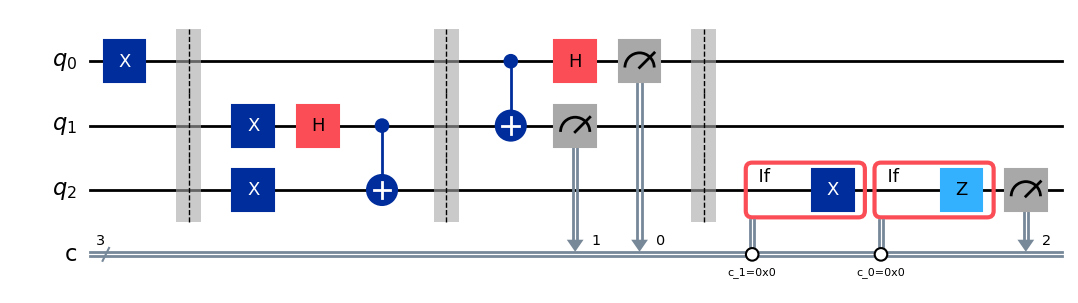

In [ ]:
#Circuito
qc = QuantumCircuit(3,3)
qc.x(0)
qc.barrier()
qc.x(1)
qc.x(2)
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
# Copar el código del ejercicio anterior
# Aplicamos la corrección según los resultados
with qc.if_test((1,0)): #Dejar este
    qc.x(2)
with qc.if_test((0,0)):
    qc.z(2)
qc.measure(2,2)
qc.draw('mpl')

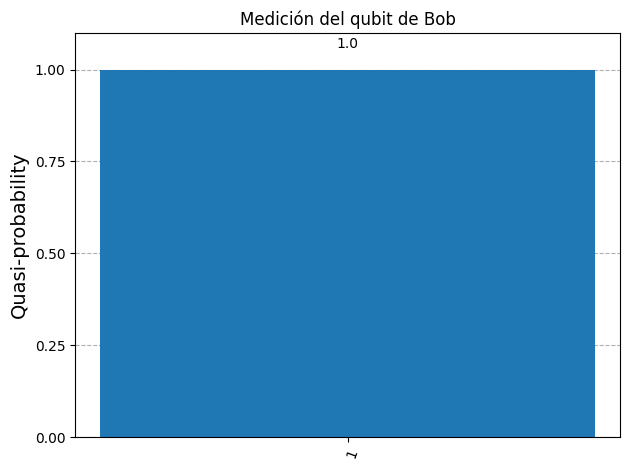

In [ ]:
#Simulación
sampler = Sampler()
job = sampler.run(qc)
result = job.result()
counts = result.quasi_dists[0].binary_probabilities()
plot_histogram(counts)
from collections import Counter
bob_distribution = Counter()
for outcome, prob in counts.items():
    bob_bit = outcome[0]  # primer bit = qubit 2 = Bob porque qiskit entrega la info en bit 2,bit 1, bit 0...
    bob_distribution[bob_bit] += prob
plot_histogram(bob_distribution, title="Medición del qubit de Bob")

## ¿Y si el estado de Alice se genera aleatoriamente?

In [ ]:
theta = np.random.uniform(0, np.pi)
phi = np.random.uniform(0, 2 * np.pi)
qc = QuantumCircuit(3,3)
qc.ry(theta, 0)
qc.rz(phi, 0)
qc.barrier()
qc.x(1)
qc.x(2)
qc.h(1)
qc.cx(1,2)
qc.barrier()
qc.cx(0,1)
qc.h(0)
qc.measure(0,0)
qc.measure(1,1)
qc.barrier()
with qc.if_test((1,0)):
    qc.x(2)
with qc.if_test((0,0)):
    qc.z(2)
qc.measure(2,2)
sampler = Sampler()
job = sampler.run(qc)
result = job.result()
counts = result.quasi_dists[0].binary_probabilities()
plot_histogram(counts)
from collections import Counter
bob_distribution = Counter()
for outcome, prob in counts.items():
    bob_bit = outcome[0]  # primer bit = qubit 2 = Bob porque qiskit entrega la info en bit 2,bit 1, bit 0...
    bob_distribution[bob_bit] += prob
P0 = np.cos(theta / 2) ** 2
P1 = np.sin(theta / 2) ** 2
print(f"Distribución teórica: '0':{P0:.4f}, '1': {P1:.4f}")
print(f"Distribución simulada: {bob_distribution}")

Distribución teórica: '0':0.6201, '1': 0.3799
Distribución simulada: Counter({'0': 0.64453125, '1': 0.35546875})


# Referencias

1. [QuantumCircuit Class: ``.if_test``](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#qiskit.circuit.QuantumCircuit.if_test)

2. [Qiskit v2.0 migration guide](https://docs.quantum.ibm.com/migration-guides/qiskit-2.0)
3. Apunte del curso.

# Contacto

María Paz Barría <br>
Estudiante Doctorado en Ciencias Físicas <br>
Universidad de Concepción<br>
marbarria@udec.cl